In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
import pandas as pd
from pathlib import Path
from trading_signal import signal_gen_J, signal_gen_2, signal_gen_3
from backtest import Timing_backtest_day
import warnings
warnings.filterwarnings('ignore')
import talib as ta
PATH1 = Path.cwd()

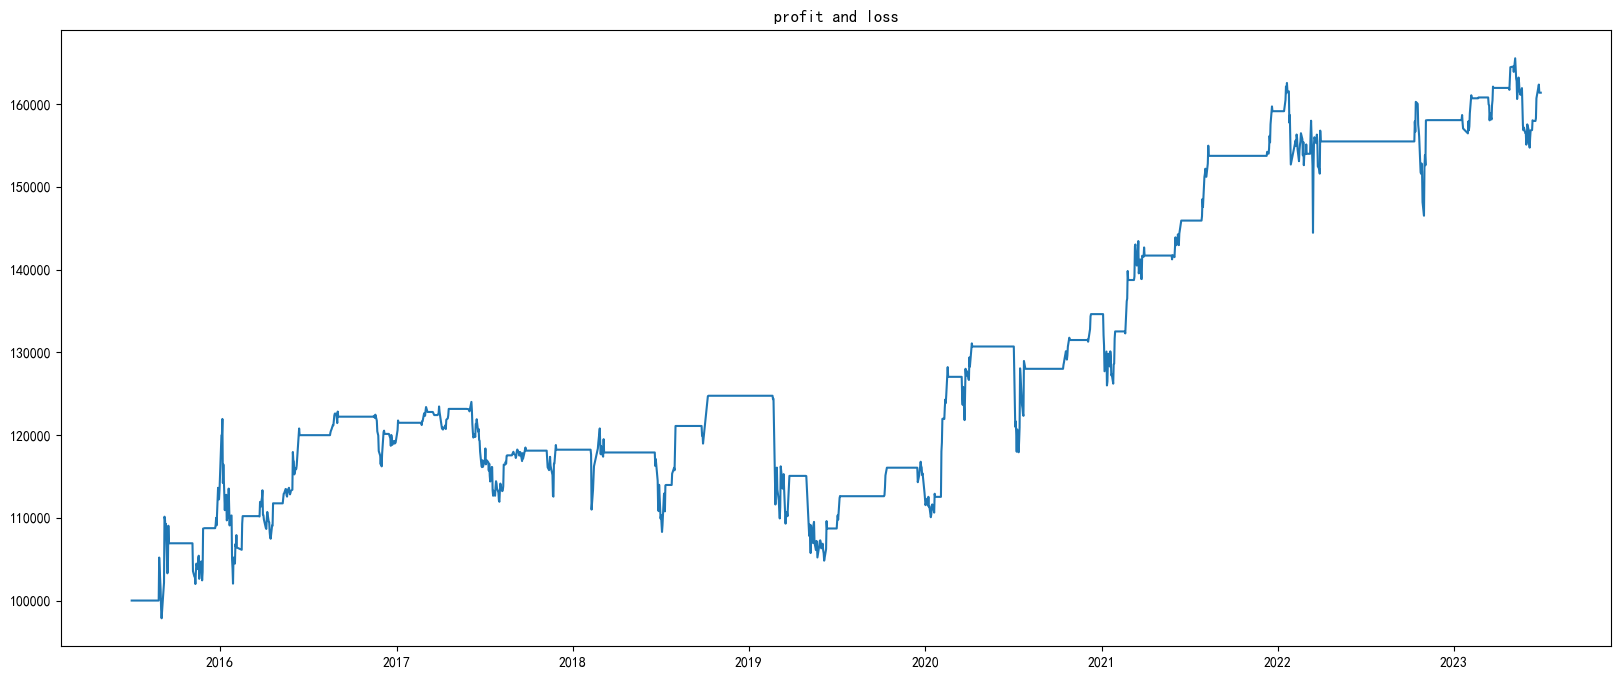

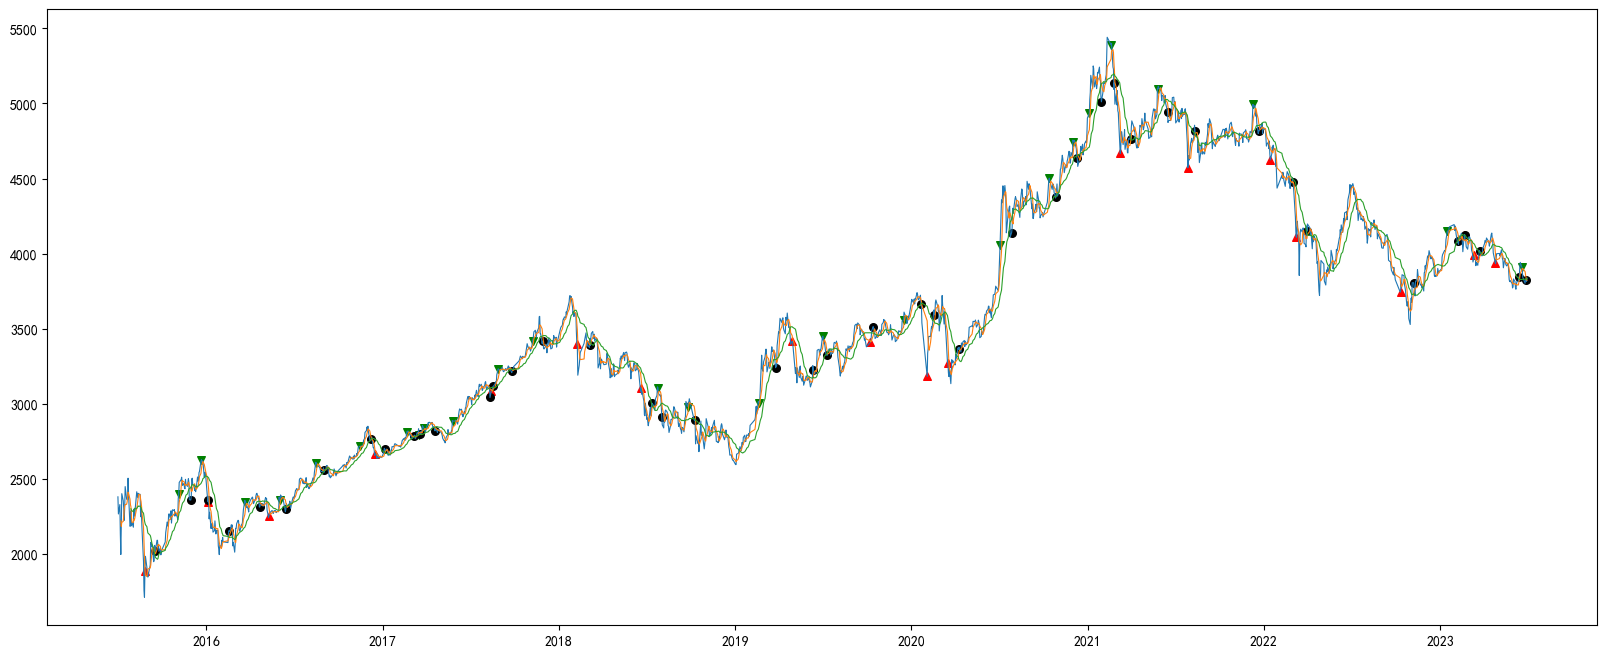

平均收益率     0.072372
标准差       0.143756
夏普比率      0.503440
最大回撤      0.199288
胜率        0.666667
盈亏比       1.126204
开仓次数     45.000000
dtype: float64

In [2]:
subject = '沪深300期货主力日数据.xlsx'

start = '2015-07-01'
end = '2023-06-30'
backtest = Timing_backtest_day(signal_gen_2, subject, omit_len=20, interval=1)

close, signal, net, pnl1 = backtest.get_signal_net(start, end)
signals, per_pnl, performance = backtest.get_performance(signal, net, pnl1)
sma_5 = ta.SMA(close, timeperiod=5)
sma_20 = ta.SMA(close, timeperiod=20)

plt.figure(figsize = (20,8))
plt.plot(pnl1)
plt.title('profit and loss')
plt.show()

plt.figure(figsize = (20,8))
plt.plot(close, lw = 0.8)
plt.plot(sma_5, lw = 0.8)
plt.plot(sma_20, lw = 0.8)
plt.scatter(signal.index[signal == 1], close.loc[signal == 1].values, c = 'red', marker = '^', s = 30)
plt.scatter(signal.index[signal == -1], close.loc[signal == -1].values, c = 'green', marker = 'v', s = 30)
plt.scatter(signal.index[signal == 0], close.loc[signal == 0].values, c = 'black', s = 30)
plt.show()

performance

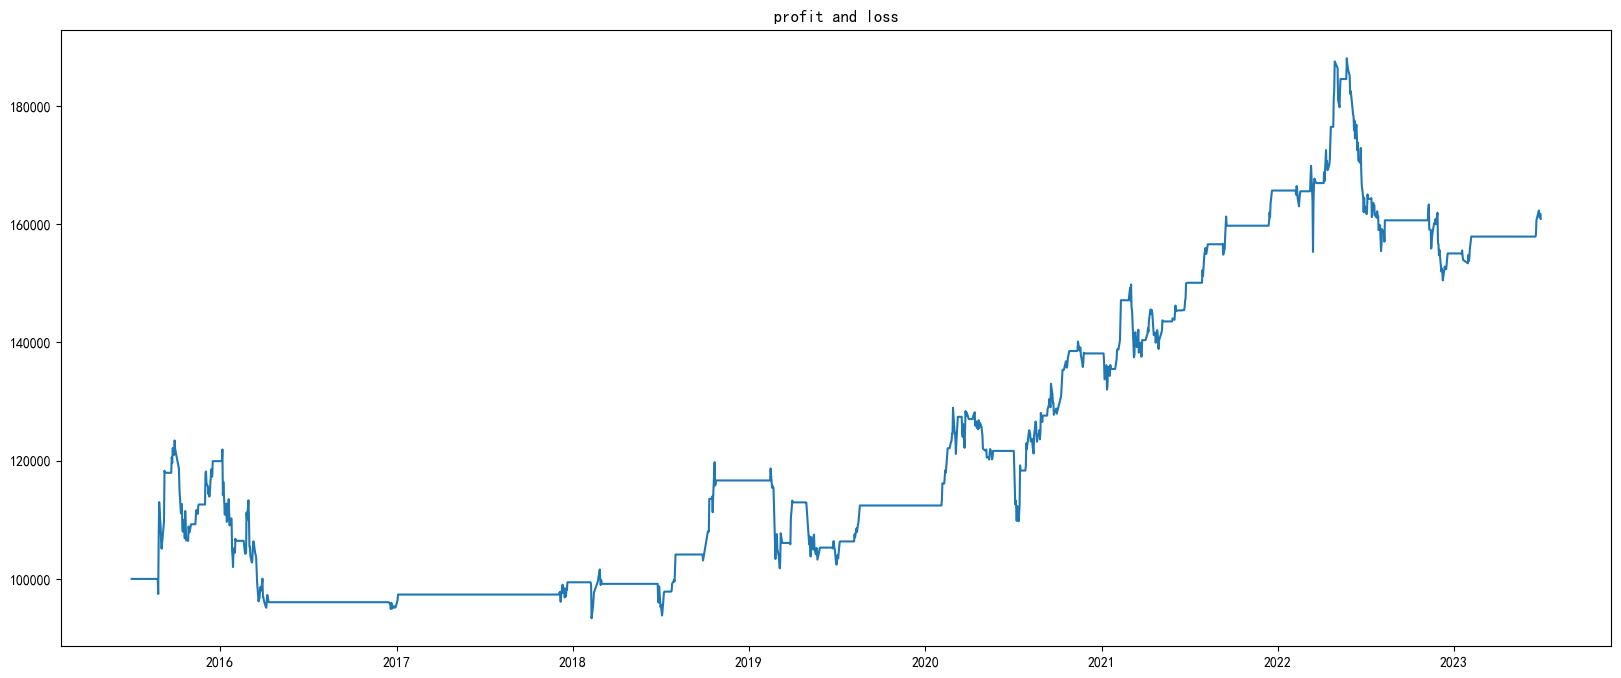

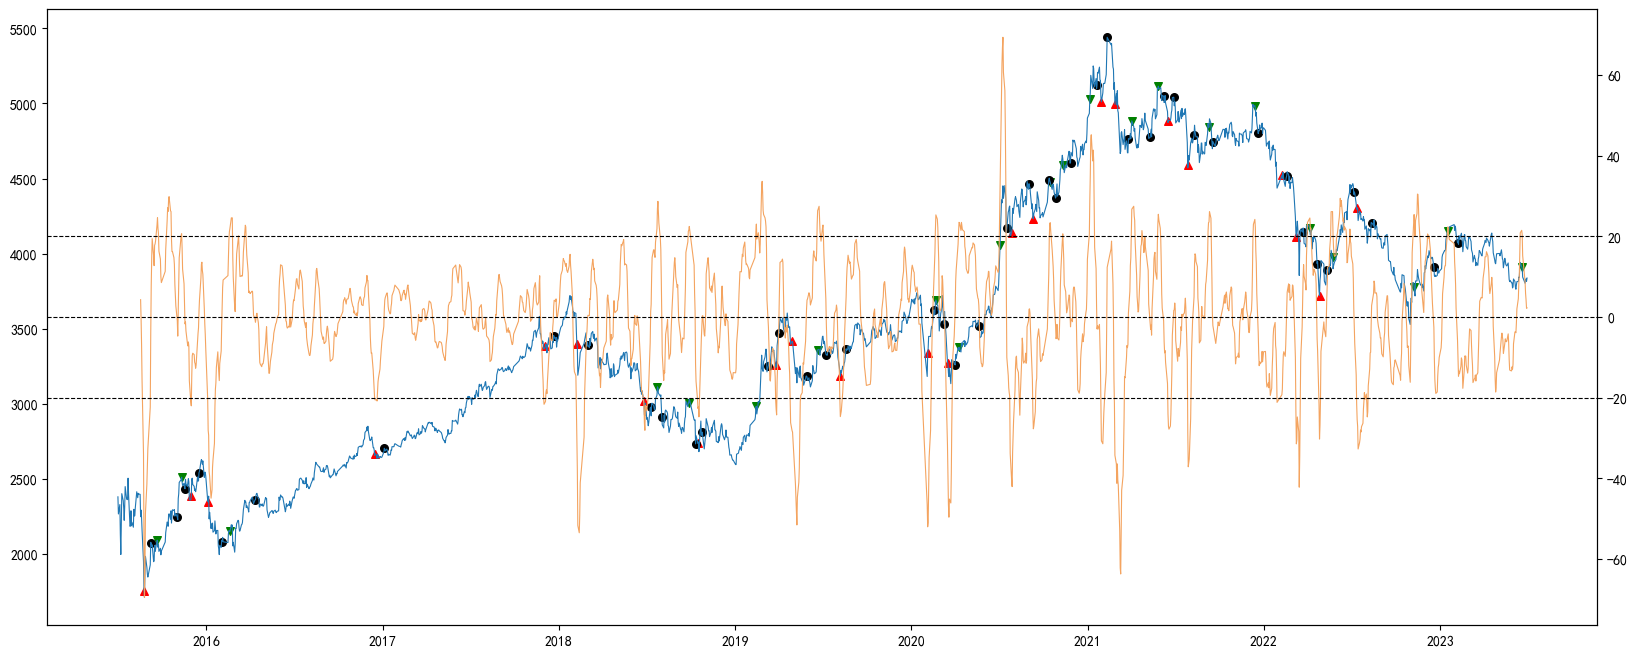

平均收益率     0.073680
标准差       0.155216
夏普比率      0.474695
最大回撤      0.375712
胜率        0.688889
盈亏比       0.780077
开仓次数     45.000000
dtype: float64

In [3]:
subject = '沪深300期货主力日数据.xlsx'

start = '2015-07-01'
end = '2023-06-30'
backtest = Timing_backtest_day(signal_gen_3, subject, omit_len=20, interval=1)

close, signal, net, pnl2 = backtest.get_signal_net(start, end)
signals, per_pnl, performance = backtest.get_performance(signal, net, pnl2)
_,_,macd = ta.MACD(close)

plt.figure(figsize = (20,8))
plt.plot(pnl2)
plt.title('profit and loss')
plt.show()

plt.figure(figsize = (20,8))
ax1 = plt.subplot()
ax1.plot(close, lw = 0.8)
ax1.scatter(signal.index[signal == 1], close.loc[signal == 1].values, c = 'red', marker = '^', s = 30)
ax1.scatter(signal.index[signal == -1], close.loc[signal == -1].values, c = 'green', marker = 'v', s = 30)
ax1.scatter(signal.index[signal == 0], close.loc[signal == 0].values, c = 'black', s = 30)
ax2 = ax1.twinx()
ax2.plot(macd, lw = 0.8, c = 'sandybrown')
ax2.axhline(y = 20, c = 'black', lw = 0.8, ls = '--')
ax2.axhline(y = -20, c = 'black', lw = 0.8, ls = '--')
ax2.axhline(y = 0, c = 'black', lw = 0.8, ls = '--')
plt.show()

performance

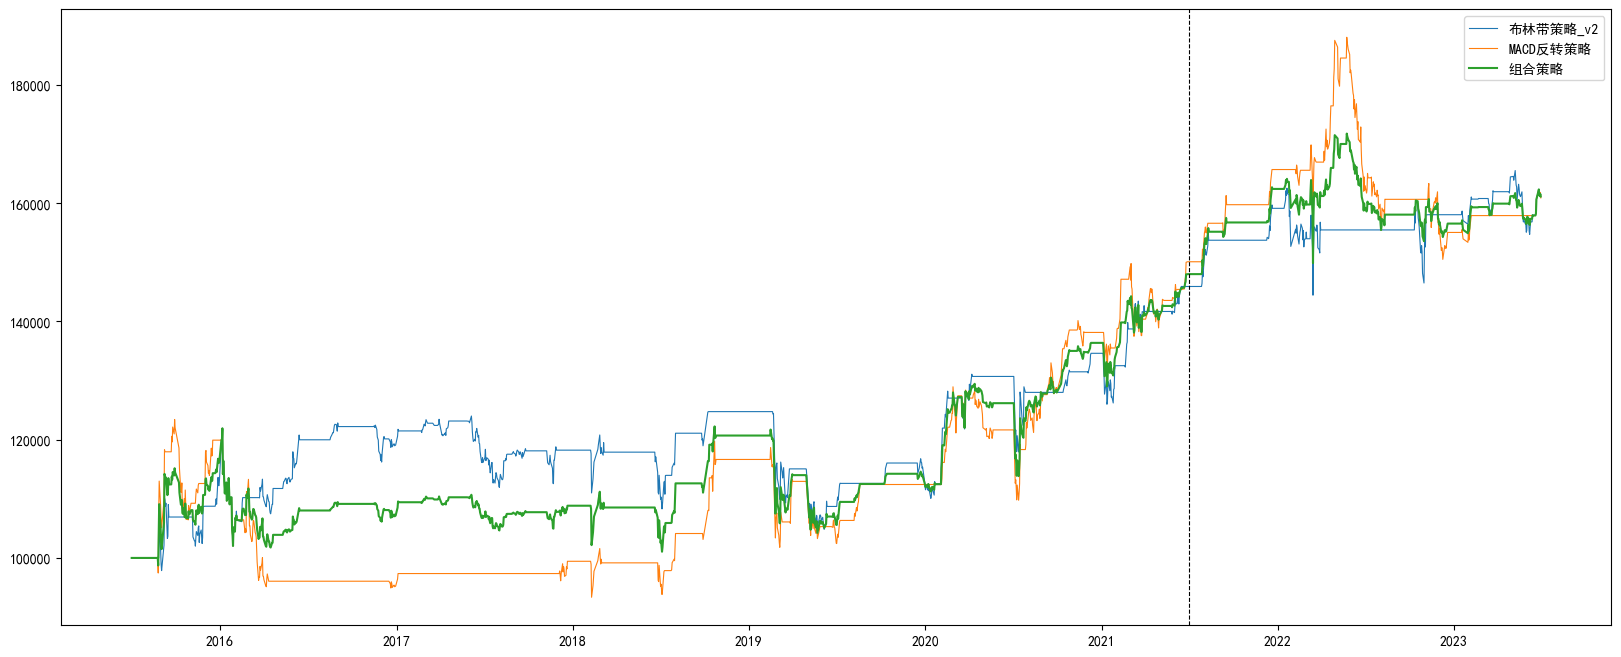

In [4]:
plt.figure(figsize = (20,8))
plt.plot(pnl1, label = '布林带策略_v2', lw = 0.8)
plt.plot(pnl2, label = 'MACD反转策略', lw = 0.8)
plt.plot((pnl1 + pnl2) / 2, label = '组合策略')
plt.legend()
plt.axvline(x = pd.to_datetime('20210701'), c = 'black', lw = 0.8, ls = '--')
plt.show()

In [5]:
def get_performance(pnl, initcap = 1e5):
    performance  = pd.Series(index = ['平均收益率', '标准差', '夏普比率', '最大回撤'], dtype='float64')

    ret = pnl.pct_change().dropna()
    performance['平均收益率'] = ret.mean() * 252
    performance['标准差'] = ret.std() * np.sqrt(252)
    performance['夏普比率'] = performance['平均收益率'] / performance['标准差']
    c_max = pnl.iloc[0]
    mdd = 0
    for i in range(1, len(pnl)):
        c_max = max(c_max, pnl.iloc[i])
        mdd = max(mdd, c_max - pnl.iloc[i])
    performance['最大回撤'] = mdd / initcap
    return performance

performance = get_performance(((pnl1 + pnl2) / 2).loc[:'20210630'])

In [6]:
get_performance(((pnl1 + pnl2) / 2).loc['20210701':], initcap = ((pnl1 + pnl2) / 2).loc['20210701'])

平均收益率    0.048943
标准差      0.096841
夏普比率     0.505395
最大回撤     0.122940
dtype: float64

In [7]:
get_performance(pnl1.loc['20210701':], initcap = ((pnl1 + pnl2) / 2).loc['20210701'])

平均收益率    0.058498
标准差      0.110413
夏普比率     0.529807
最大回撤     0.122355
dtype: float64

In [8]:
get_performance(pnl2.loc['20210701':], initcap = ((pnl1 + pnl2) / 2).loc['20210701'])

平均收益率    0.043232
标准差      0.118652
夏普比率     0.364360
最大回撤     0.253838
dtype: float64